In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
!git clone https://github.com/tesseract-ocr/tessdata_best.git


Cloning into 'tessdata_best'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 259 (delta 2), reused 4 (delta 0), pack-reused 250
Receiving objects: 100% (259/259), 1.30 GiB | 27.42 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (168/168), done.


In [3]:
!ls tessdata_best

afr.traineddata		  est.traineddata	kir.traineddata       san.traineddata
amh.traineddata		  eus.traineddata	kmr.traineddata       script
ara.traineddata		  fao.traineddata	kor.traineddata       sin.traineddata
asm.traineddata		  fas.traineddata	kor_vert.traineddata  slk.traineddata
aze_cyrl.traineddata	  fil.traineddata	lao.traineddata       slv.traineddata
aze.traineddata		  fin.traineddata	lat.traineddata       snd.traineddata
bel.traineddata		  fra.traineddata	lav.traineddata       spa_old.traineddata
ben.traineddata		  frm.traineddata	LICENSE		      spa.traineddata
bod.traineddata		  fry.traineddata	lit.traineddata       sqi.traineddata
bos.traineddata		  gla.traineddata	ltz.traineddata       srp_latn.traineddata
bre.traineddata		  gle.traineddata	mal.traineddata       srp.traineddata
bul.traineddata		  glg.traineddata	mar.traineddata       sun.traineddata
cat.traineddata		  grc.traineddata	mkd.traineddata       swa.traineddata
ceb.traineddata		  guj.traineddata	mlt.traineddata    

In [4]:
import os

os.environ['TESSDATA_PREFIX'] = '/content/tessdata_best/'

In [32]:
import cv2
import pytesseract
import re
import string
from google.colab.patches import cv2_imshow


Original image


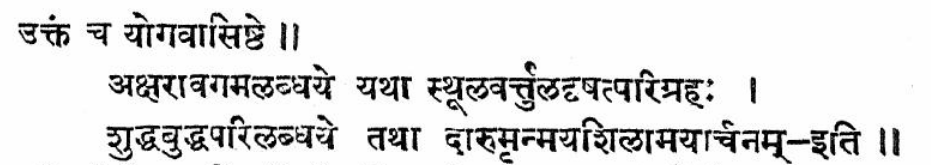

Destroyed image


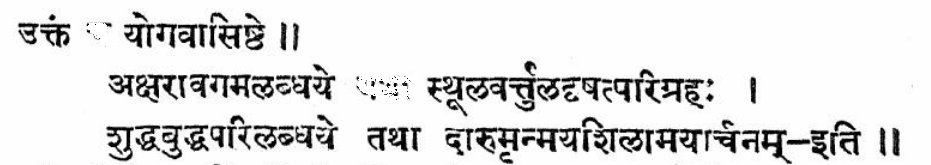

In [64]:
# load the original image and destroyed/input image
print("Original image")
image1 = cv2.imread("td.png")
cv2_imshow(image1)

print("Destroyed image")
image2 = cv2.imread("blurredtd.png")
cv2_imshow(image2)

In [65]:
def extract_text_from_image(image):
    #Use Optical Character Recognition (OCR) to extract text from the image.
    text = pytesseract.image_to_string(image)
    return text

#Text preprocessing functions
def clean_and_tokenize_text(text):
    #Remove unwanted characters, punctuation, and whitespace.
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = " ".join(text.split())
    return text

#Extract and clean text from the binary image using OCR
extracted_text = pytesseract.image_to_string(image2, lang='san')
cleaned_and_tokenized_text = clean_and_tokenize_text(extracted_text)

print(extracted_text)

उक्त ` ` योगवासिष्ठे |
््‌ ष 4
अक्षरावगमख्च्धये <: स्थरूखन्तुखटटषत्परिम्रहः ।
शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्‌-इति ॥



In [66]:
print(cleaned_and_tokenized_text)

उक्त योगवासिष्ठे ््‌ ष 4 अक्षरावगमख्च्धये स्थरूखन्तुखटटषत्परिम्रहः । शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्‌इति ॥


In [55]:
!pip install torch
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.3 MB/s eta 0:00:00


In [56]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="Samuela39/my-awesome-model",
    tokenizer="Samuela39/my-awesome-model"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/334M [00:00<?, ?B/s]

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at Samuela39/my-awesome-model and are newly initialized: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/435k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/338k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

In [68]:
fill_mask("उक्त <mask> योगवासिष्ठे ््‌ ष 4 अक्षरावगमख्च्धये <mask> स्थरूखन्तुखटटषत्परिम्रहः । शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्‌इति ॥")

[[{'score': 0.00048118041013367474,
   'token': 11661,
   'token_str': 'पफ',
   'sequence': '<s>उक्तपफ योगवासिष्ठे ््\u200c ष 4 अक्षरावगमख्च्धये<mask> स्थरूखन्तुखटटषत्परिम्रहः । शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्\u200cइति ॥</s>'},
  {'score': 0.0004687323234975338,
   'token': 6138,
   'token_str': ' कलहस',
   'sequence': '<s>उक्त कलहस योगवासिष्ठे ््\u200c ष 4 अक्षरावगमख्च्धये<mask> स्थरूखन्तुखटटषत्परिम्रहः । शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्\u200cइति ॥</s>'},
  {'score': 0.00046200878568924963,
   'token': 917,
   'token_str': ' अल',
   'sequence': '<s>उक्त अल योगवासिष्ठे ््\u200c ष 4 अक्षरावगमख्च्धये<mask> स्थरूखन्तुखटटषत्परिम्रहः । शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्\u200cइति ॥</s>'},
  {'score': 0.00044733111280947924,
   'token': 2651,
   'token_str': ' वडव',
   'sequence': '<s>उक्त वडव योगवासिष्ठे ््\u200c ष 4 अक्षरावगमख्च्धये<mask> स्थरूखन्तुखटटषत्परिम्रहः । शुद्धबुद्धपरिन्धये तथा दारमन्मयशिखामय चैनम्\u200cइति ॥</s>'},
  {'score': 0.0004079176869709044

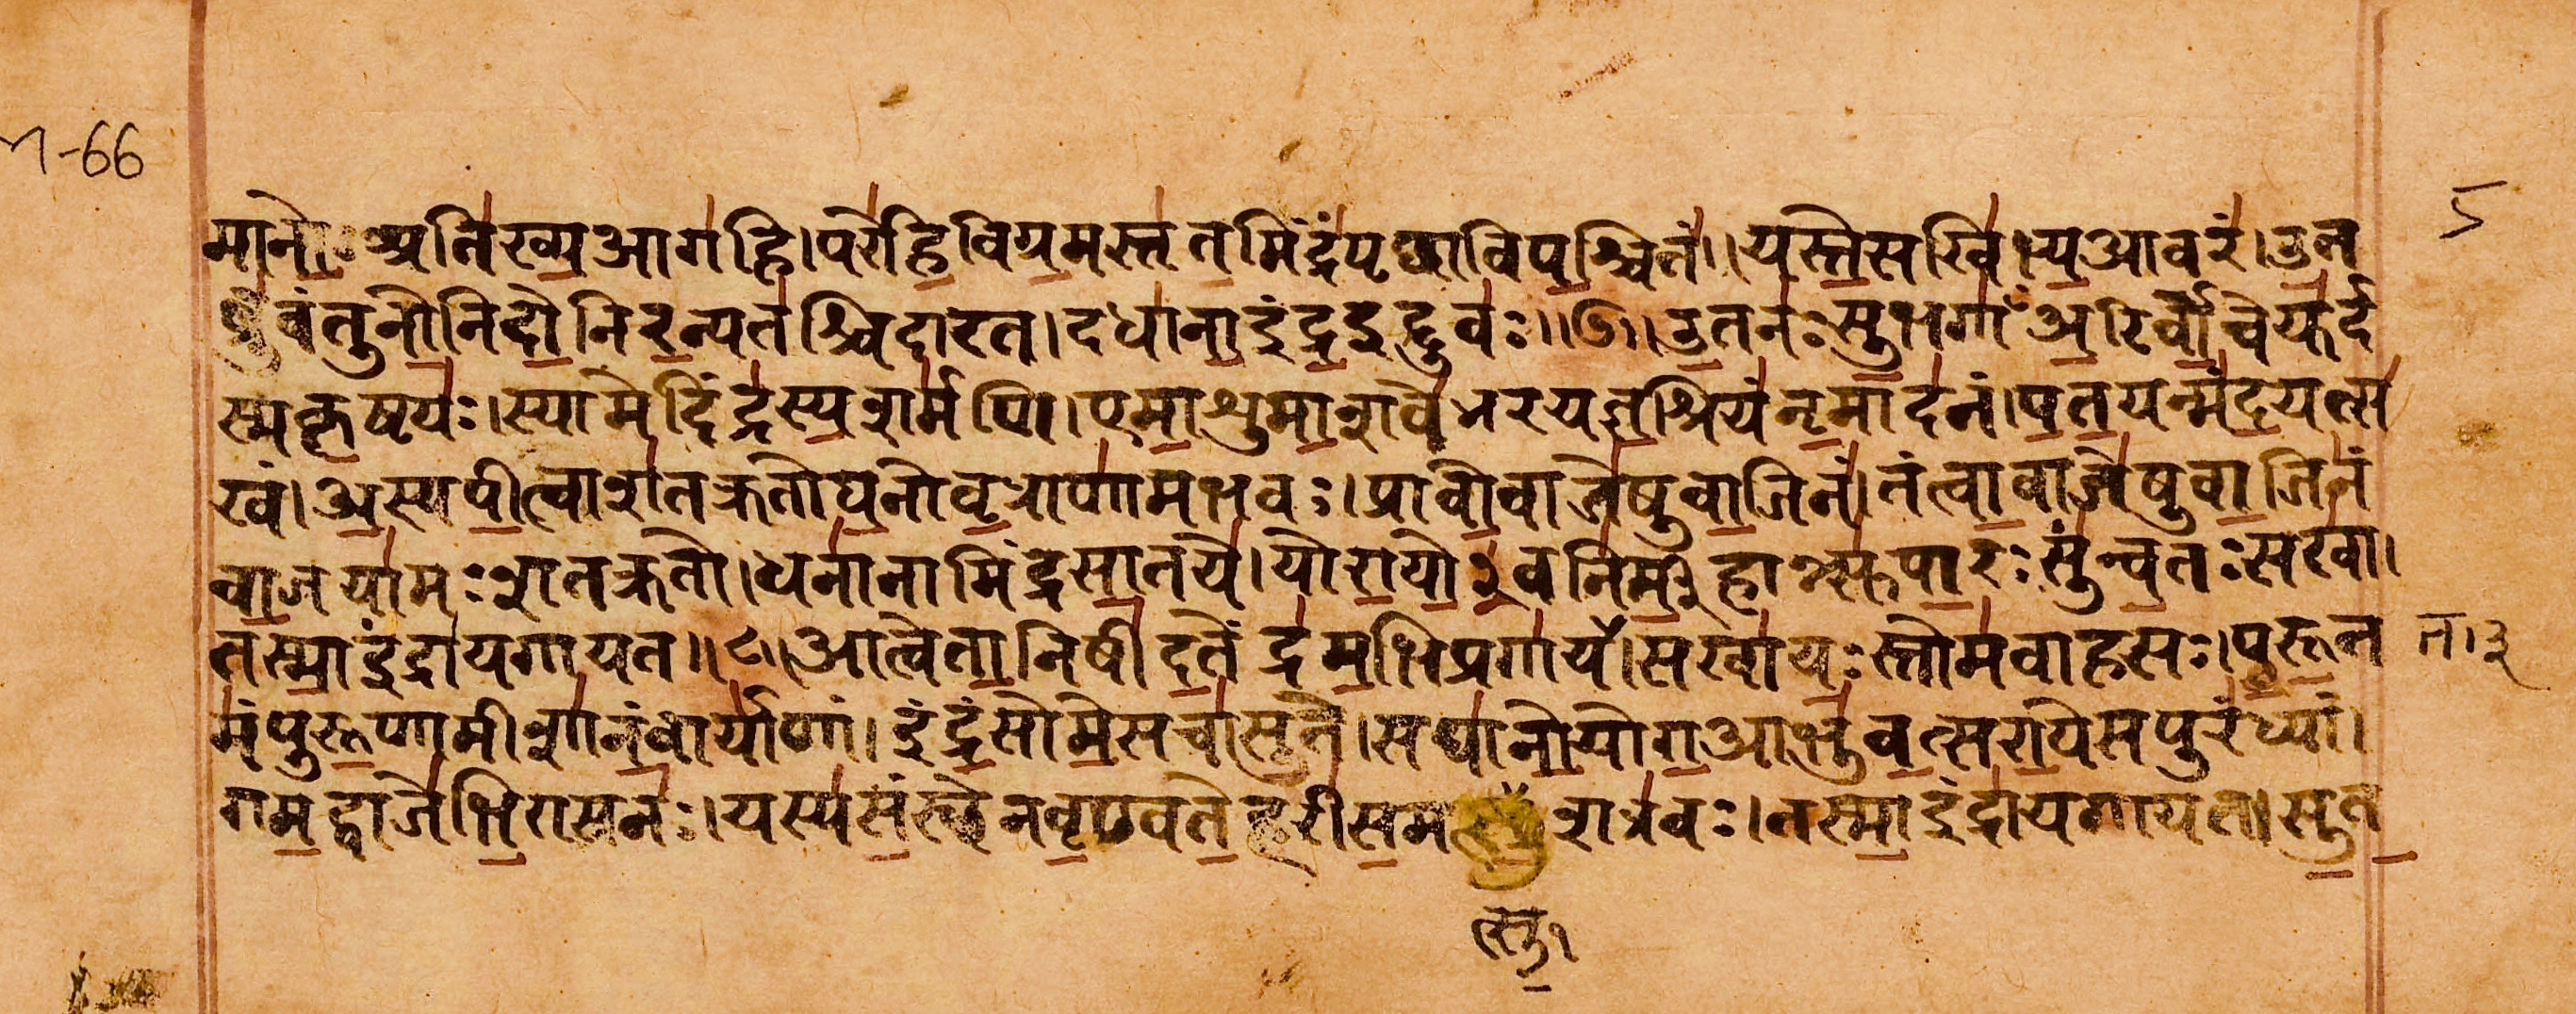

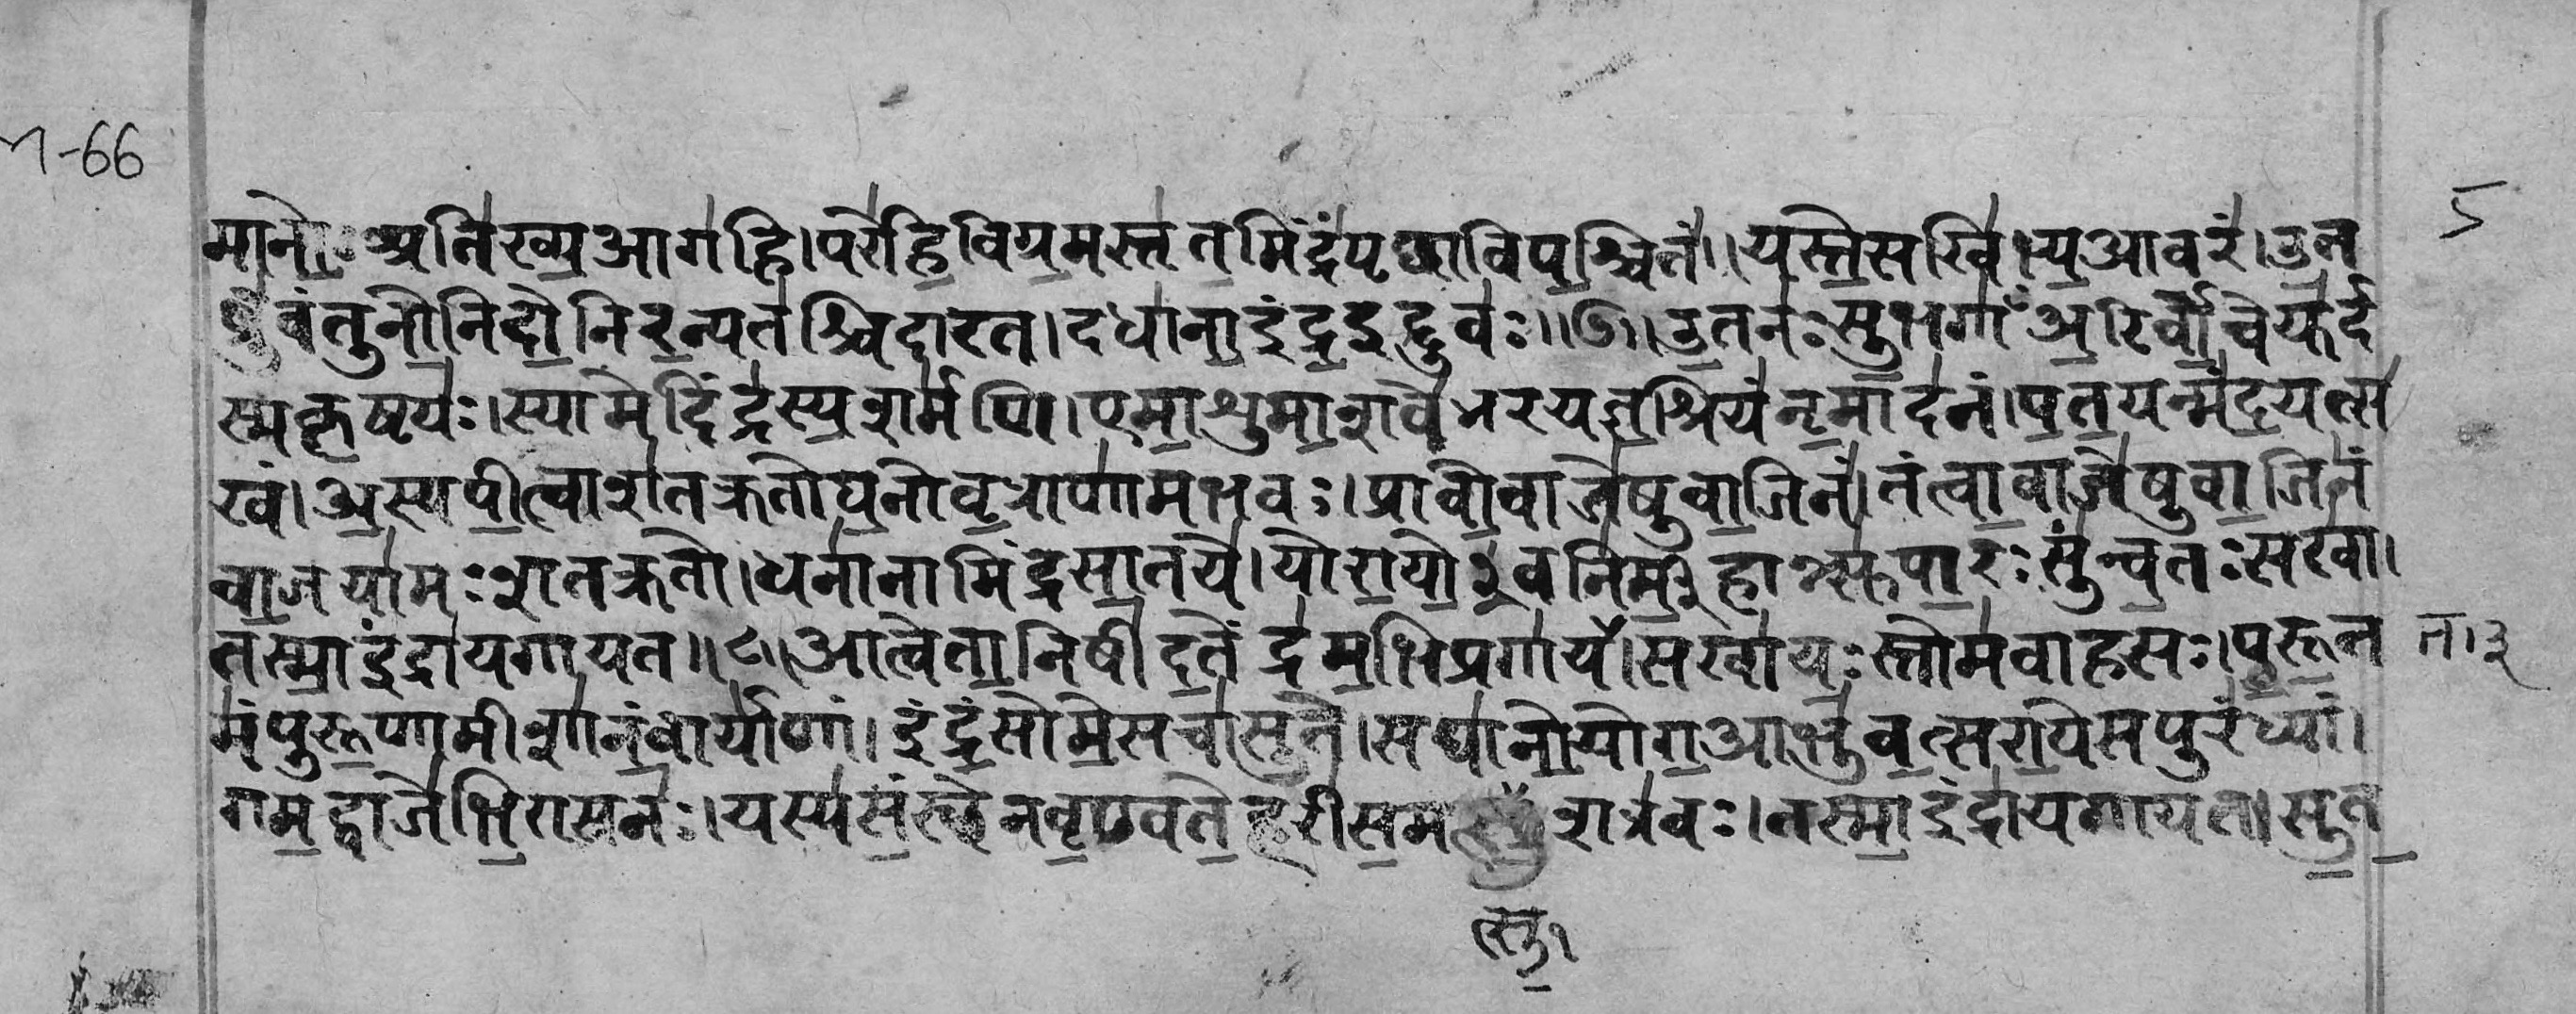

In [50]:
'''# load the input image and convert it to grayscale
image = cv2.imread("3.jpg")
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)'''